In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold


In [2]:
# Load the data
data = pd.read_csv("cell2celltrain.csv")

In [3]:
# Drop rows with missing target variable 'Churn' assuming 'Churn' is your target
data = data.dropna(subset=['Churn'])

In [4]:
# Impute missing values in features
# Numeric features imputation
num_imputer = SimpleImputer(strategy='median')
data[data.select_dtypes(include=['int', 'float']).columns] = num_imputer.fit_transform(data.select_dtypes(include=['int', 'float']))

In [5]:
# Categorical features imputation
cat_imputer = SimpleImputer(strategy='most_frequent')
data[data.select_dtypes(include=['object']).columns] = cat_imputer.fit_transform(data.select_dtypes(include=['object']))

In [6]:
# Encode categorical columns
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if column != 'Churn':  # Ensure not to encode the target column
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

In [7]:
# Assuming 'Churn' is the target variable
X = data.drop('Churn', axis=1)
y = data['Churn']

In [8]:
# Encode target variable 'Churn' into numerical labels
le_churn = LabelEncoder()
y = le_churn.fit_transform(data['Churn'])

In [9]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Define models within a pipeline that includes scaling
models = {
    'Decision Tree': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(random_state=42))
    ]),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

In [11]:
# Dictionary to store evaluation results
results = {}

In [12]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Assuming a binary classification; adjust 'average' parameter as needed
    results[name] = {
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1-Score': f1_score(y_test, y_pred, average='macro'),
        'ROC-AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, 'predict_proba') else 'N/A',
        'Accuracy': (y_pred == y_test).mean()
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T  # Transpose to have models as rows

# Save the DataFrame to a CSV file
results_df.to_csv('without_Featuring_Engineering_and_Without_Cross_validation.csv')

# Save the results to an Excel file
results_df.to_excel('without_Featuring_Engineering_and_Without_Cross_validation.xlsx', index=False)

# Print the results
print(results_df)

                     Precision    Recall  F1-Score   ROC-AUC  Accuracy
Decision Tree         0.548790  0.550193  0.549351  0.550193  0.627914
Random Forest         0.668225  0.531126  0.491339  0.660091  0.724192
Logistic Regression   0.577998  0.507327  0.443553  0.616151  0.713320
Gradient Boosting     0.674986  0.527217  0.482224  0.675969  0.723800
XGBoost               0.638476  0.566943  0.562168  0.666033  0.722527


In [13]:
# Cross-validation testing to check if the model is not overfitting
#cv_results = {}
#for name, model in models.items():
   # kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    #cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
   #cv_results[name] = cv_scores.mean()

In [14]:
# Convert cross-validation results to DataFrame
#cv_results_df = pd.DataFrame(cv_results, index=['Cross Validation Accuracy'])
#cv_results_df.index.name = 'Evaluation Metric'
#cv_results_df.to_csv('Model_Performance_with_Featuring_Engineering_and_With_Cross_validation.csv')
#print(cv_results_df)

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

In [16]:
# Create an empty DataFrame to store the results
cv_results_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC','Accuracy'])

In [17]:
# Iterate through the models and perform cross-validation
for name, model in models.items():
    # Perform cross-validation with multiple scoring metrics
    cv_scores = cross_validate(model, X, y, cv=5, scoring=['precision', 'recall', 'f1', 'roc_auc','accuracy'], 
                               return_train_score=False)

    # Store averaged results
    results = {
        'Model': name,
        'Precision': np.mean(cv_scores['test_precision']),
        'Recall': np.mean(cv_scores['test_recall']),
        'F1-Score': np.mean(cv_scores['test_f1']),
        'ROC-AUC': np.mean(cv_scores['test_roc_auc']),
        'Accuracy': np.mean(cv_scores['test_accuracy'])
    }
    
    # Append results to the DataFrame
    cv_results_df = cv_results_df.append(results, ignore_index=True)

# Display the results in the notebook
print(cv_results_df)

# Save the results to a CSV file
cv_results_df.to_csv('without_Featuring_Engineering_and_With_Cross_validation.csv', index=False)

# Save the results to an Excel file
cv_results_df.to_excel('without_Featuring_Engineering_and_With_Cross_validation.xlsx', index=False)

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Temp\ipykernel_3972\1535461668.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cv_results_df = cv_results_df.append(results, ignore_index=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Temp\ipykernel_3972\1535461668.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pand

                 Model  Precision    Recall  F1-Score   ROC-AUC  Accuracy
0        Decision Tree   0.208872  0.459279  0.279025  0.468533  0.472469
1        Random Forest   0.255524  0.353304  0.233949  0.526165  0.535780
2  Logistic Regression   0.493534  0.039763  0.070267  0.617998  0.710247
3    Gradient Boosting   0.247463  0.385113  0.239274  0.566146  0.505495
4              XGBoost   0.412709  0.315995  0.210880  0.533943  0.548766


C:\Users\user\AppData\Local\Temp\ipykernel_3972\1535461668.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cv_results_df = cv_results_df.append(results, ignore_index=True)


In [18]:
import pandas as pd

# Function to load and merge data
def load_and_merge_data():
    # Replace 'path_to_your_first_csv.csv' and 'path_to_your_second_csv.csv'
    # with the actual paths to your CSV files.
    df_without_cv = pd.read_csv('without_Featuring_Engineering_and_Without_Cross_validation.csv')
    df_with_cv = pd.read_csv('without_Featuring_Engineering_and_With_Cross_validation.csv')
    
    # Rename the column in df_with_cv for consistency
    df_with_cv.rename(columns={"Model": "Evaluation Metric"}, inplace=True)
    
    return df_without_cv, df_with_cv

# Function to write data to an Excel file
def write_to_excel(df_without_cv, df_with_cv):
    # Create a Pandas Excel writer using XlsxWriter as the engine
    with pd.ExcelWriter('without_Featuring_Engineering_merged_may11.xlsx', engine='xlsxwriter') as writer:
        # Write each dataframe to a different worksheet with custom header
        df_without_cv.to_excel(writer, sheet_name='Without Cross Validation', startrow=1, index=False)
        worksheet1 = writer.sheets['Without Cross Validation']
        worksheet1.write('A1', 'Model Performance without Cross Validation')

        df_with_cv.to_excel(writer, sheet_name='With Cross Validation', startrow=1, index=False)
        worksheet2 = writer.sheets['With Cross Validation']
        worksheet2.write('A1', 'Model Performance with Cross Validation')

# Main function to orchestrate the operations
def main():
    df_without_cv, df_with_cv = load_and_merge_data()
    write_to_excel(df_without_cv, df_with_cv)
    print("Excel file has been created successfully.")

# Execute the main function
main()

Excel file has been created successfully.


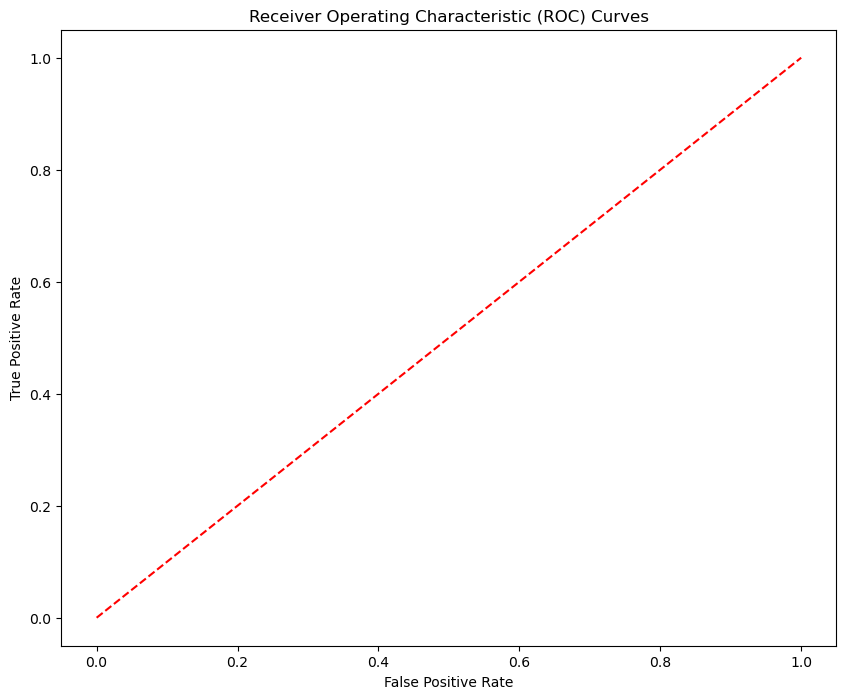

In [20]:
# Initialize plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], 'r--')

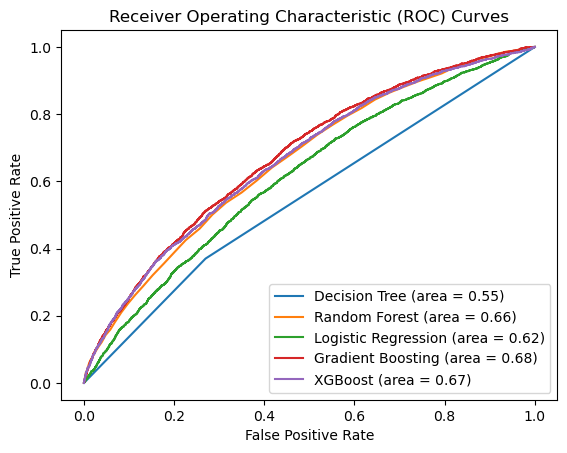

In [22]:
# Train each model and plot their ROC curves
from sklearn.metrics import roc_curve, auc

for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):  # Check if model supports probability predictions
        y_prob = model.predict_proba(X_test)[:, 1]
    else:  # Use decision function if predict_proba is not available
        y_prob = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()